<a href="https://colab.research.google.com/github/nemanja1995/Deep-Learning/blob/master/Visualizing-CNN/Visualizing_intermediate_activations-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
keras.__version__
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')

#witch layers to visualize
model_layer = []
model_layer.append(model.layers[2])
model_layer.append(model.layers[8])
model_layer.append(model.layers[15])
model_layer.append(model.layers[17])

#path to image. You must add picture to path folder...
img_path = 'dog.jpg'

## Visualizing intermediate activations

Visualizing intermediate activations consists in displaying the feature maps that are output by various convolution and pooling layers in a 
network, given a certain input (the output of a layer is often called its "activation", the output of the activation function). This gives 
a view into how an input is decomposed unto the different filters learned by the network. These feature maps we want to visualize have 3 
dimensions: width, height, and depth (channels). Each channel encodes relatively independent features, so the proper way to visualize these 
feature maps is by independently plotting the contents of every channel, as a 2D image.


# Convolution
This is main operatin in convolutional netvorks (CNNs).

![alt text](https://raw.githubusercontent.com/nemanja1995/Deep-Learning/master/Visualizing%20CNN/Pictures/convolution.jpg)

# Full Convolution

![alt text](https://raw.githubusercontent.com/nemanja1995/Deep-Learning/master/Visualizing%20CNN/Pictures/fullConvolution.png)

# Full convolutional neural network

![alt text](https://raw.githubusercontent.com/nemanja1995/Deep-Learning/master/Visualizing%20CNN/Pictures/Cnn.jpeg)

# VGG16

This is a picture of the architecture of neural network witch activations from layers are visualized.

![alt text](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

In [0]:


# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.


Let's display our picture:

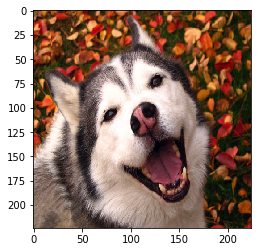

In [0]:


plt.imshow(img_tensor[0])
plt.show()

In order to extract the feature maps we want to look at, we will create a Keras model that takes batches of images as input, and outputs 
the activations of all convolution and pooling layers. To do this, we will use the Keras class `Model`. A `Model` is instantiated using two 
arguments: an input tensor (or list of input tensors), and an output tensor (or list of output tensors). The resulting class is a Keras 
model, just like the `Sequential` models that you are familiar with, mapping the specified inputs to the specified outputs. What sets the 
`Model` class apart is that it allows for models with multiple outputs, unlike `Sequential`. 

In [0]:
from keras import models

# Extracts the outputs of the selected layers (selected in beggining of the notebook):
layer_outputs = [layer.output for layer in model_layer]

#layer_outputs = [layer.output for layer in model.layers[2:18]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# one array per layer activation
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

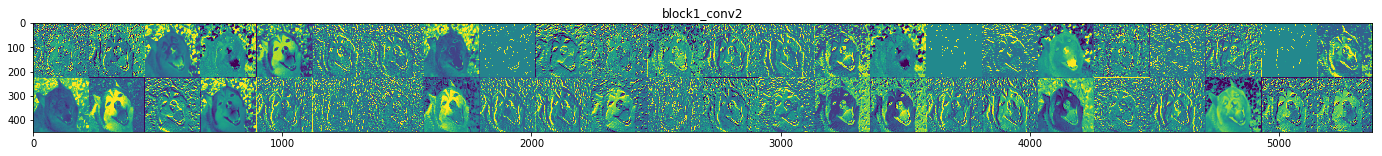

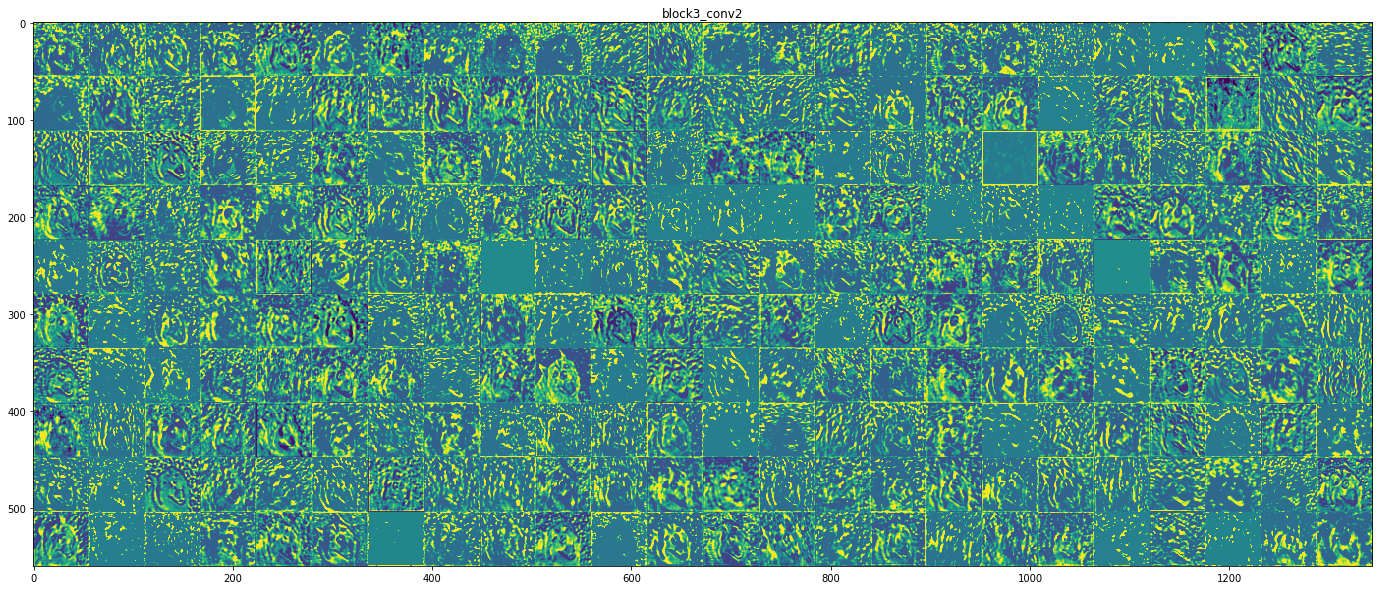

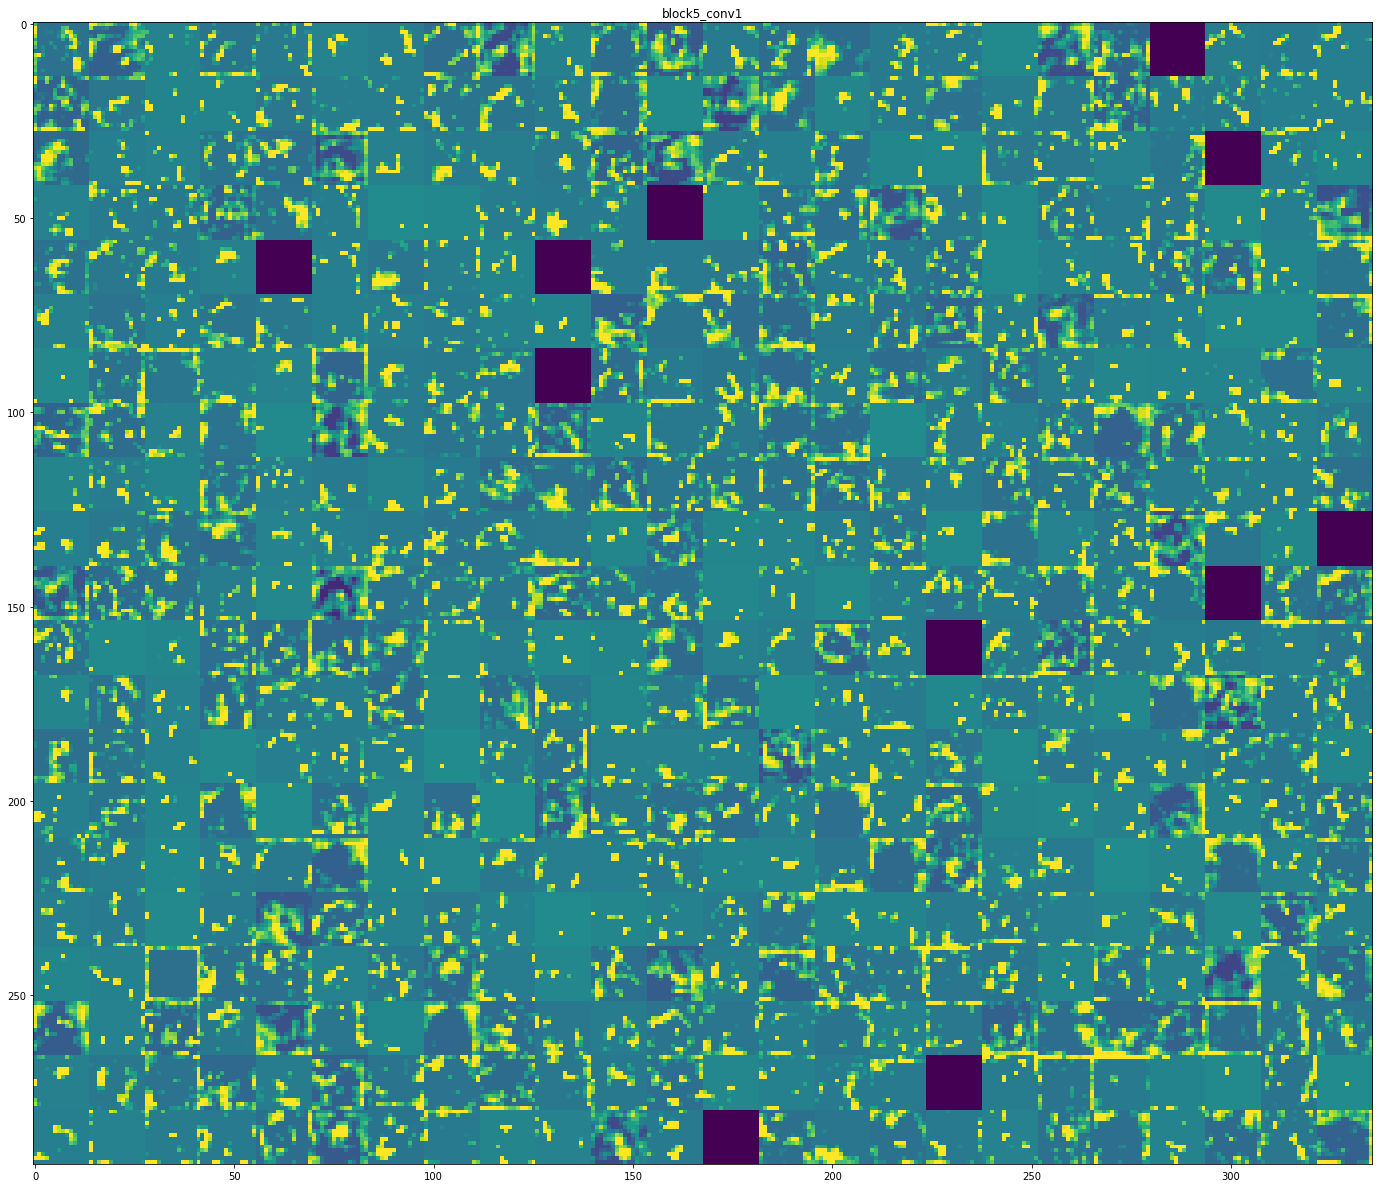

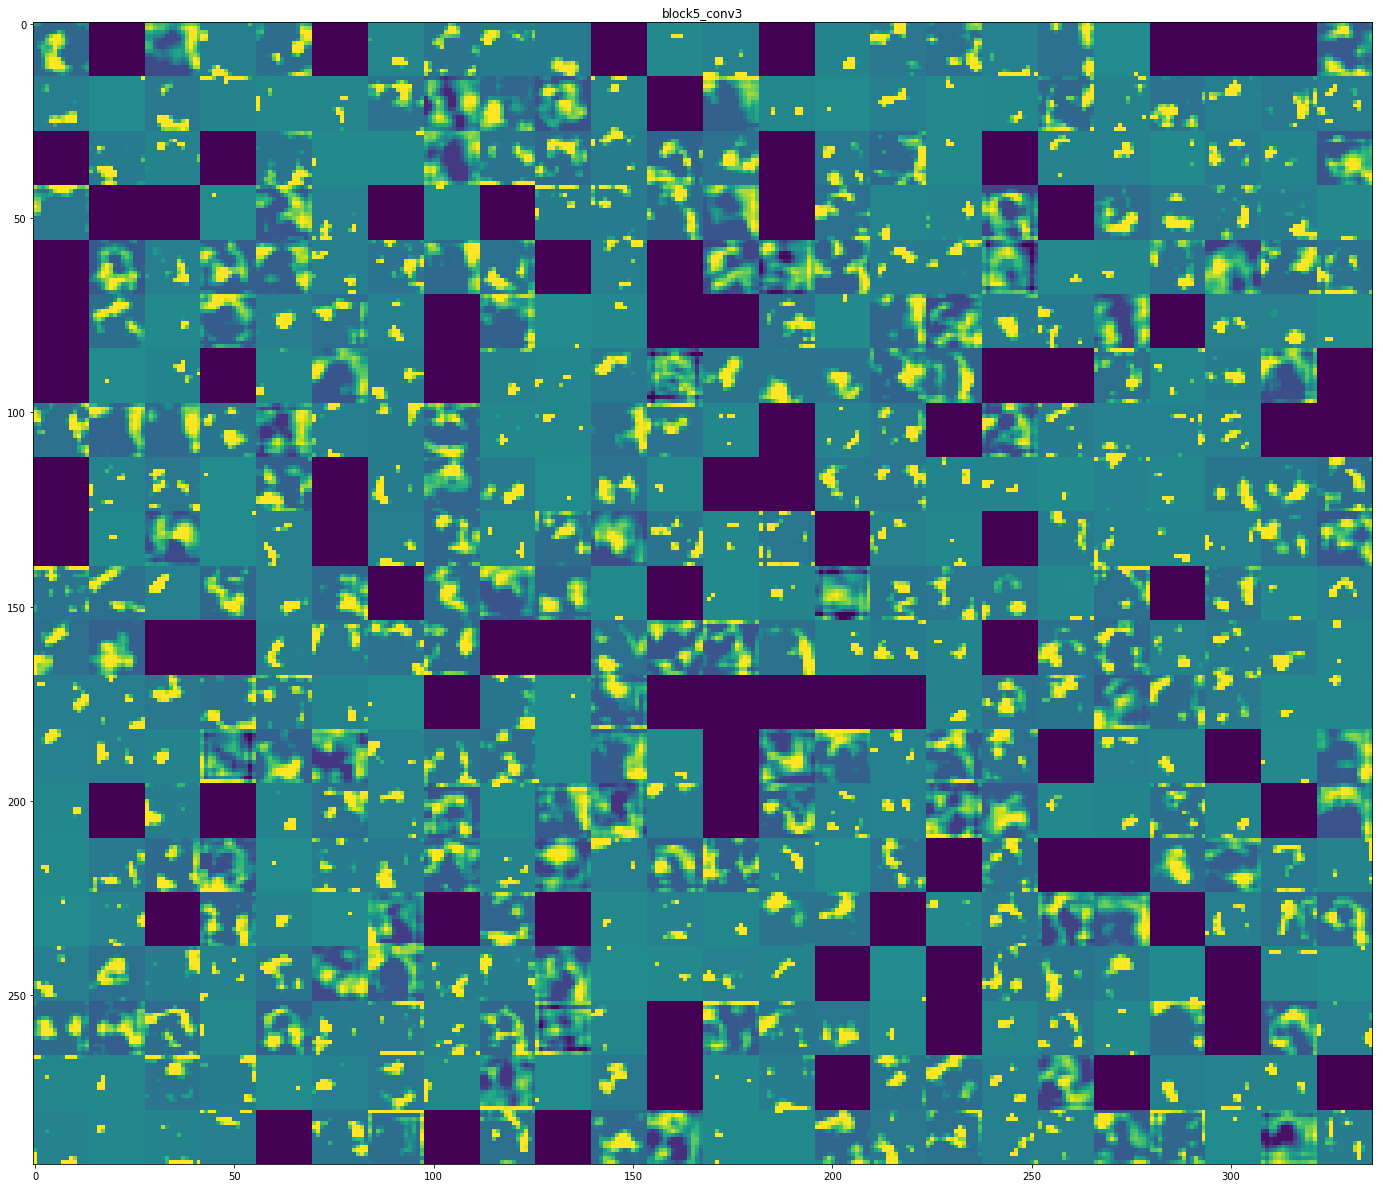

In [0]:
import keras
import numpy as np

#select how much images you want in row
images_per_row = 24

# These are the names of the layers, so can have them as part of our plot
layer_names = []

for layer in model_layer:
    layer_names.append(layer.name)


# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()